# [Notebook 09] Binary Classification

__Building a neural network for binary classification with KaiTorch.__

Note: these notebooks aren't meant to showcase best practices in data processing or training neural networks, it's simply meant as a quick and easy way to showcase a working neural network 🙂

## Dataset

For our dataset, we'll be using `sklearn.datasets.make_moons`, a classic example of a binary regression problem with a non-linear decision boundary.

#### Generating the Moon Dataset

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

n_samples = 250

X, y = datasets.make_moons(n_samples=n_samples, noise=0.05)
# X = np.concatenate([X, np.cos(X), X**2], axis=1)

__Plotting the data__

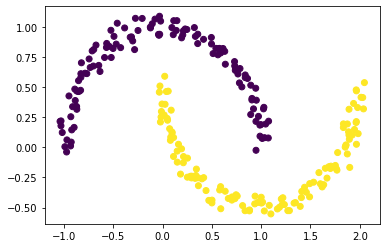

In [2]:
plt.scatter(X[:,0],X[:,1],c=y);

__Train/Test split__

In [3]:
X = X.tolist()
y = y.tolist()

X_train = X[:200]
y_train = y[:200]

X_test = X[200:]
y_test = y[200:]

## Building a Neural Net

In [4]:
from kaitorch.models import Sequential
from kaitorch.layers import Dense, Dropout
from kaitorch.optimizers import Adam
from kaitorch.losses import BinaryCrossentropy

In [5]:
model = Sequential()

model.add(Dense(40, activation='sigmoid', initializer='glorot_uniform'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='sigmoid', initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer=Adam(lr=0.03),
    loss=BinaryCrossentropy()
)

In [6]:
model.build(input_size=2)
model.summary()

___________________________________________________________________________________________________________________
Layer (params)                                                           Output Shape     Params = Weights + Biases
Dense(units=40, activation=sigmoid, initializer=glorot_uniform)          (None, 40)       120      80        40    
___________________________________________________________________________________________________________________
Dropout(dropout_rate=0.4)                                                (None, 40)       0        0         0     
___________________________________________________________________________________________________________________
Dense(units=8, activation=sigmoid, initializer=glorot_uniform)           (None, 8)        328      320       8     
___________________________________________________________________________________________________________________
Dense(units=1, activation=sigmoid, initializer=glorot_uniform)          

## Training a Neural Net

In [7]:
%%time
history = model.fit(X_train, y_train, epochs=30)

Epoch  30/30: 100%|████████████████████████████████████████| 200/200 [00:03<00:00, Train Loss: 0.3502]


CPU times: user 1min 46s, sys: 4.95 s, total: 1min 51s
Wall time: 1min 58s


## Results

Calculating model accuracy and visualizing class predictions of the 100 test samples.

In [8]:
y_pred = model.predict(X_test)
y_pred = [round(pred) for pred in y_pred]

Epoch   1/1: 100%|████████████████████████████████████████| 50/50 [00:01<00:00]


In [9]:
def print_accuracy(y_test, y_pred):
    
    matches = [test == pred for test, pred in zip(y_test, y_pred)]
    
    accuracy_dec = sum(matches)/len(matches)
    
    accuracy_pct = f'{100*accuracy_dec:.4}%'

    print(f'Accuracy: {accuracy_pct}')

In [10]:
print_accuracy(y_test, y_pred)

Accuracy: 90.0%


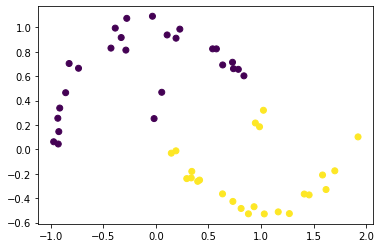

In [11]:
plt.scatter(np.array(X_test)[:,0],np.array(X_test)[:,1],c=y_pred)

## Tracing/Visualization

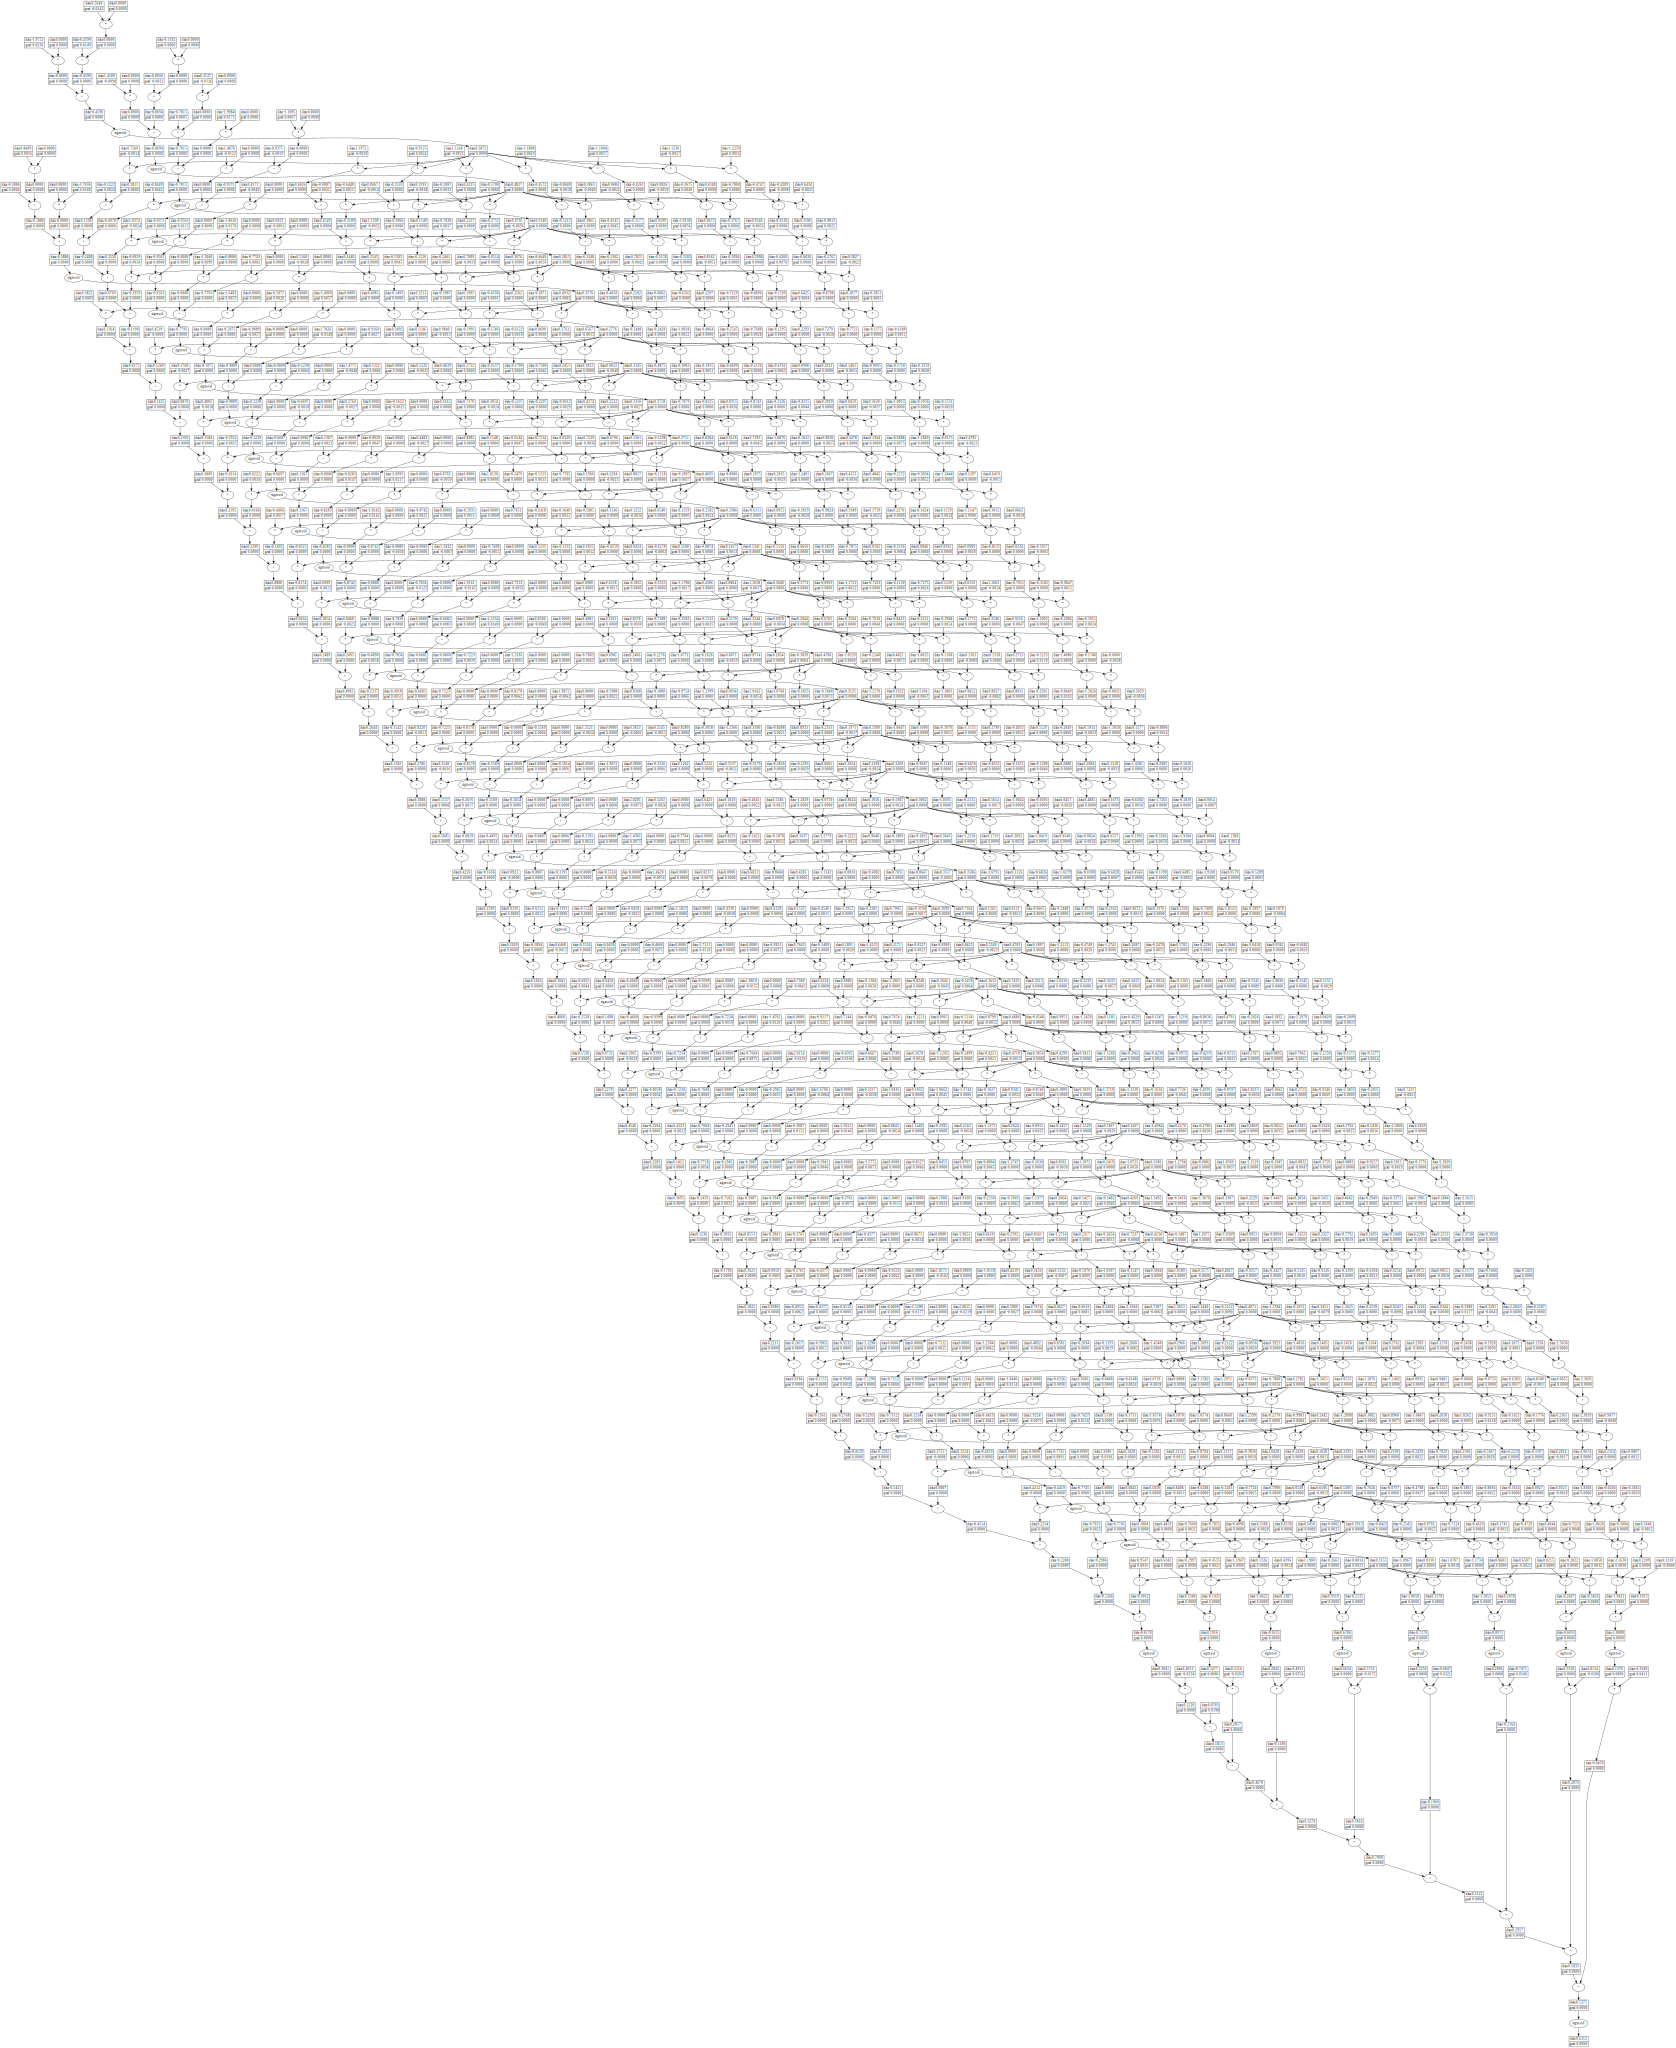

In [12]:
model.plot(filename='./imgs/binary_classification')